In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [73]:
path = r'C:\Users\Insel\rchu\Instacart Basket Analysis'

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
df_ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_custm.pkl'))

In [5]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_dependants,marital_status,income
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_ords_prods_custm.shape

(32404859, 33)

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

first_name, surname, age, marital_status are considered PII data

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
-Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

-Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [74]:
# Region 1 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

# Region 2
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# Region 3 
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Arkansas', 'Louisiana']

# Region 4
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 


In [75]:
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(Northeast), 'region'] = 'Northeast'

In [76]:
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(Midwest), 'region'] = 'Midwest'

In [77]:
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(South), 'region'] = 'South'

In [78]:
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(West), 'region'] = 'West'

In [11]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,number_dependants,marital_status,income,region
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [12]:
df_ords_prods_custm.groupby('region')['spending_flag'].value_counts()

region     spending_flag
Midwest    Low spender       7568060
           High spender        29265
Northeast  Low spender       5704094
           High spender        18642
South      Low spender      10751321
           High spender        40564
West       Low spender       8261690
           High spender        31223
Name: spending_flag, dtype: int64

In [68]:
# spending flag in each region
region_spending_flag = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['spending_flag'], dropna = False)

In [69]:
region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


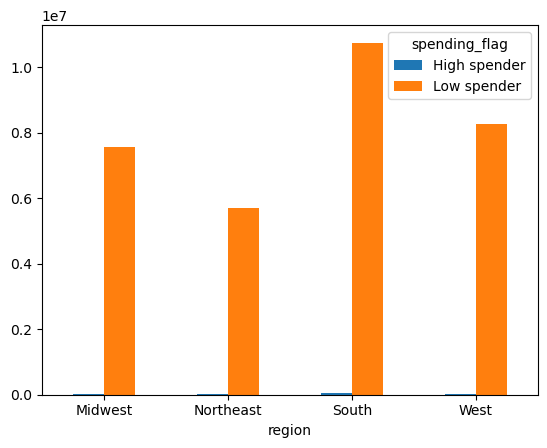

In [70]:
bar_region_spending_flag = region_spending_flag.plot.bar(rot=0)

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] < 5, 'activity_flag'] = 'Low activity'
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] >=5, 'activity_flag'] = 'High activity'

In [16]:
df_ords_prods_custm.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [17]:
ords_prods_custm_activity_flag = df_ords_prods_custm[df_ords_prods_custm['activity_flag'] == 'High activity']

In [18]:
ords_prods_custm_activity_flag.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,Thursday,15,17.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity
96,2685110,15,7,Monday,11,17.0,14715,3,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity
97,887727,15,9,Tuesday,13,7.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity
98,2600170,15,11,Tuesday,9,14.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity


In [19]:
ords_prods_custm_activity_flag.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_custm_high_activity.pkl'))

In [20]:
ords_prods_custm_activity_flag.shape

(30964564, 35)

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Flags to be created: age, income, and number of dependents.

    Age: Young (<=25), Mid-Age(26-59), Senior (60+)
    Income: Low-income (<40.000) Mid-income (40.000-100000) High-income (100.000+)
    number_dependants: Zero children, 1 or 2 children, 3+ children

In [79]:
df_ords_prods_custm['age'].agg(['min', 'max'])

min    18
max    81
Name: age, dtype: int64

In [80]:
# create age category
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] <= 25), 'age_category'] = 'Young'
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] > 25) & (df_ords_prods_custm['age'] < 60), 'age_category'] = 'mid-age'
df_ords_prods_custm.loc[df_ords_prods_custm['age'] >= 60, 'age_category'] = 'senior'

In [23]:
df_ords_prods_custm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag,age_category
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,Thursday,15,17.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,senior
96,2685110,15,7,Monday,11,17.0,14715,3,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,senior
97,887727,15,9,Tuesday,13,7.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,senior
98,2600170,15,11,Tuesday,9,14.0,14715,1,1,Coconut Water,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,senior


In [24]:
df_ords_prods_custm['income'].agg(['min', 'max', 'mean'])

min      25903.000000
max     593901.000000
mean     99437.733295
Name: income, dtype: float64

In [81]:
# create income flag
df_ords_prods_custm.loc[(df_ords_prods_custm['income'] < 40000), 'income_flag'] = 'low income'
df_ords_prods_custm.loc[(df_ords_prods_custm['income'] >= 40000) & (df_ords_prods_custm['income'] <= 100000), 'income_flag'] = 'mid income'
df_ords_prods_custm.loc[df_ords_prods_custm['income'] > 100000, 'income_flag'] = 'high income'

In [26]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependants,marital_status,income,region,activity_flag,age_category,income_flag
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income


In [82]:
# create dependants category
df_ords_prods_custm.loc[df_ords_prods_custm['number_dependants'] == 0, 'dependants_category'] = 'Zero Children'
df_ords_prods_custm.loc[df_ords_prods_custm['number_dependants'].isin([1, 2]), 'dependants_category'] = '1 or 2 children'
df_ords_prods_custm.loc[df_ords_prods_custm['number_dependants'] >= 3, 'dependants_category'] = '3+ children'

In [28]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_dependants,marital_status,income,region,activity_flag,age_category,income_flag,dependants_category
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income,3+ children
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income,3+ children
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income,3+ children
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income,3+ children
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,mid-age,mid income,3+ children


### 6. Create an appropriate visualization to show the distribution of profiles.
### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
### 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [29]:
# income flag per region
income_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['income_flag'], dropna = False)

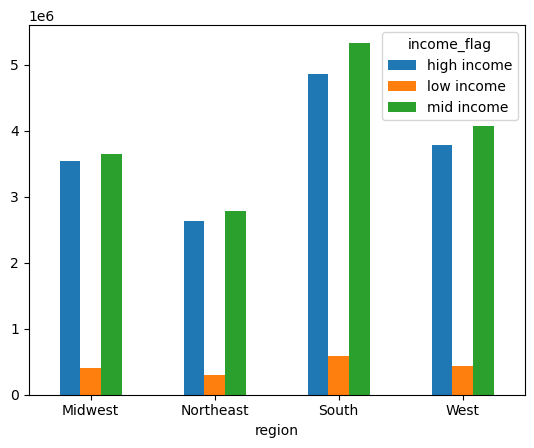

In [122]:
bar_income_region = income_region.plot.bar(rot=0)

In [31]:
# marital status per region
marital_status_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['marital_status'], dropna = False)

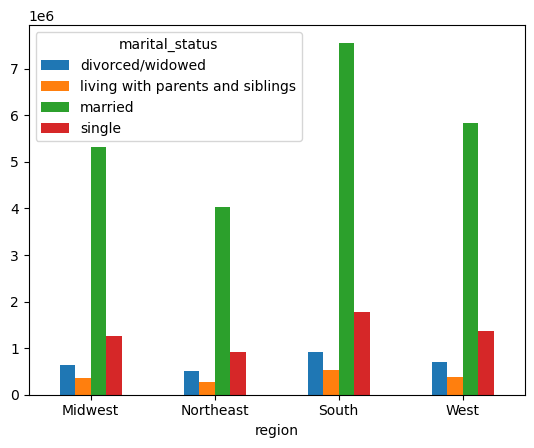

In [118]:
bar_marital_status_region = marital_status_region.plot.bar(rot=0)

In [41]:
# dependants_category per region
dependants_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['dependants_category'], dropna = False)

In [42]:
dependants_region

dependants_category,1 or 2 children,3+ children,Zero Children
region,,,
Midwest,3817458,1874667,1905200
Northeast,2859355,1445080,1418301
South,5383688,2706538,2701659
West,4111746,2108824,2072343


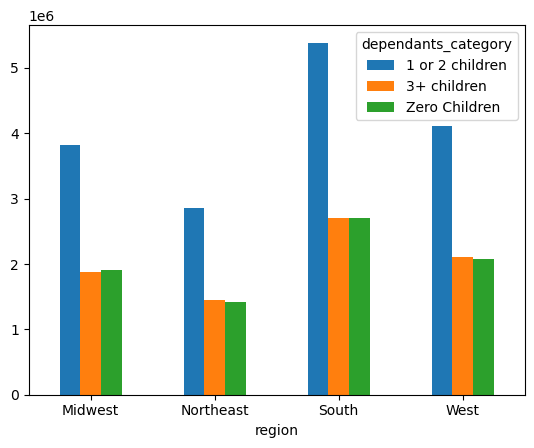

In [119]:
bar_dependants_region = dependants_region.plot.bar(rot=0)

In [35]:
# age per region
age_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['age_category'], dropna = False)

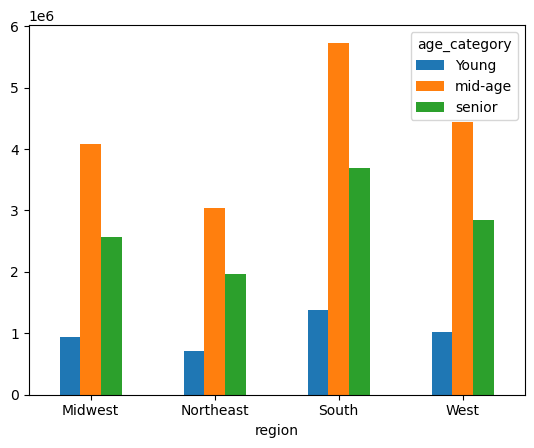

In [116]:
bar_age_region = age_region.plot.bar(rot=0)

In [37]:
# marital status by income
marital_status_income = pd.crosstab(df_ords_prods_custm['marital_status'], df_ords_prods_custm['income_flag'], dropna = False)

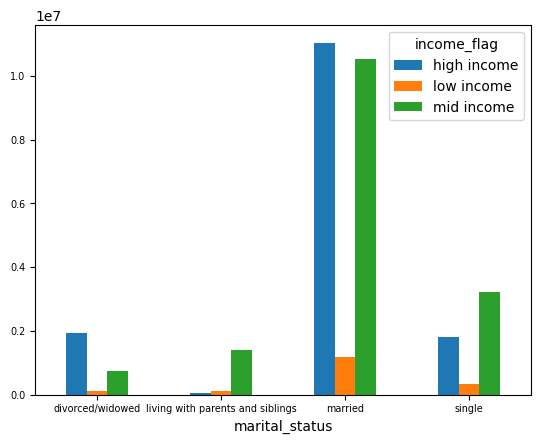

In [114]:
bar_marital_status_income = marital_status_income.plot.bar(rot=0,fontsize = 'x-small')

In [39]:
# age per income category
age_income = pd.crosstab(df_ords_prods_custm['income_flag'], df_ords_prods_custm['age_category'], dropna = False)

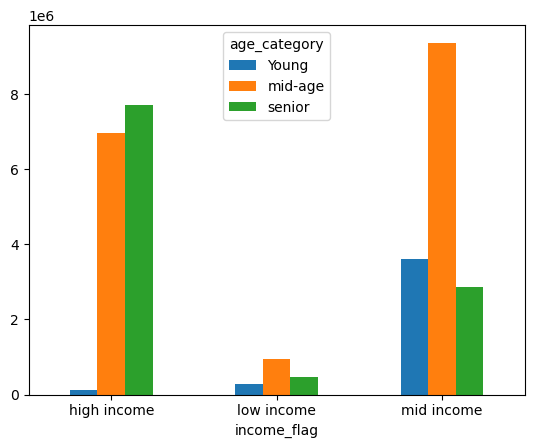

In [111]:
bar_age_income = age_income.plot.bar(rot=0)

In [41]:
# loyaly customers per region
loyalty_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['loyalty_flag'], dropna = False)

In [42]:
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


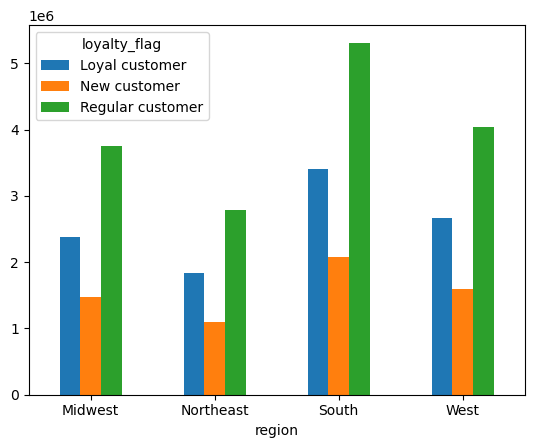

In [109]:
bar_loyalty_region = loyalty_region.plot.bar(rot=0)

In [44]:
# high activity customers per region
high_activity_region = pd.crosstab(ords_prods_custm_activity_flag['region'], ords_prods_custm_activity_flag['activity_flag'], dropna = False)

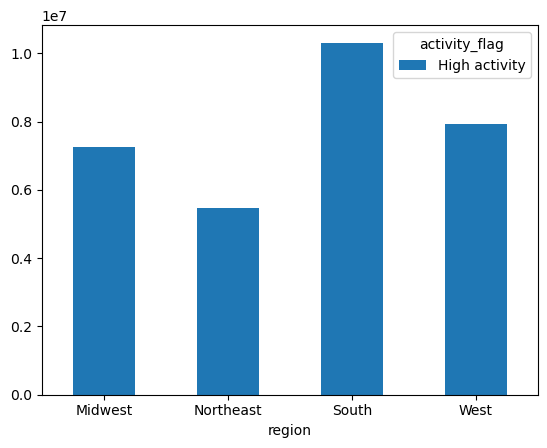

In [107]:
bar_high_activity_region = high_activity_region.plot.bar(rot=0)

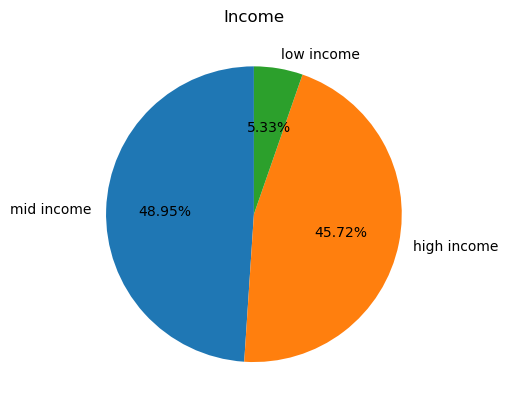

In [46]:
# create pie chart of income flag
pie_income = df_ords_prods_custm['income_flag'].value_counts().plot.pie(startangle=90,autopct='%2.2f%%',ylabel='',title='Income')

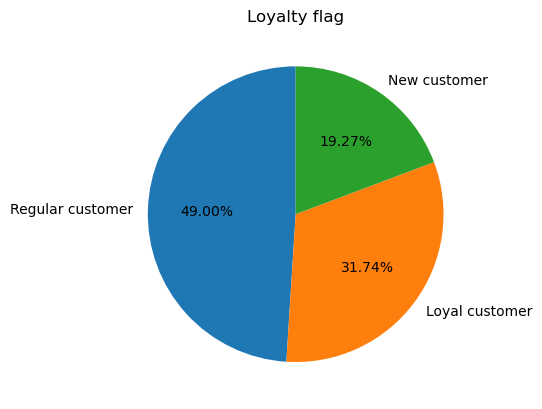

In [47]:
# create pie chart of loyalty flag
pie_loyalty = df_ords_prods_custm['loyalty_flag'].value_counts().plot.pie(startangle=90,autopct='%2.2f%%',ylabel='',title='Loyalty flag')

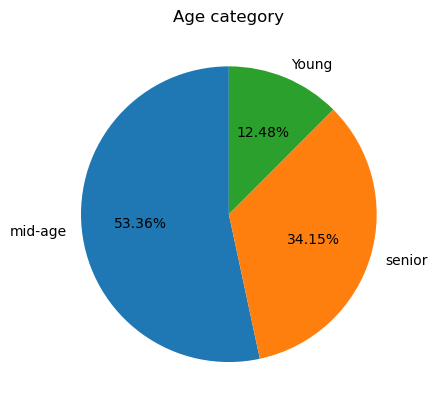

In [48]:
# create pie chart of age category
pie_age = df_ords_prods_custm['age_category'].value_counts().plot.pie(startangle=90,autopct='%2.2f%%',ylabel='',title='Age category')

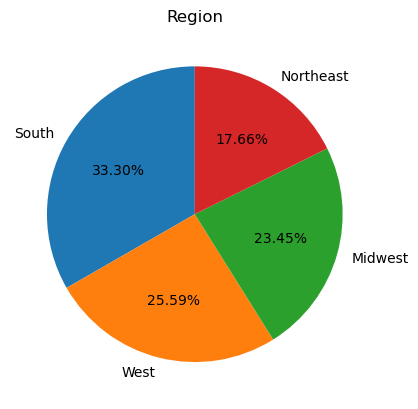

In [49]:
# create pie chart of region
pie_region = df_ords_prods_custm['region'].value_counts().plot.pie(startangle=90,autopct='%2.2f%%',ylabel='',title='Region')

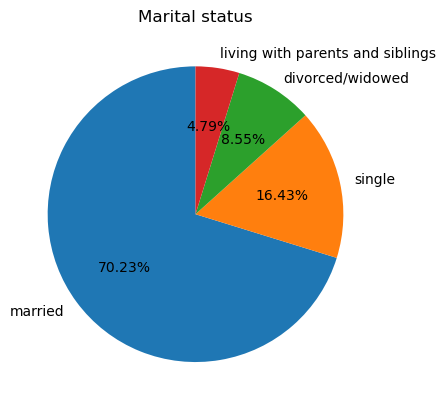

In [50]:
# create pie chart of marital status
pie_marital_status = df_ords_prods_custm['marital_status'].value_counts().plot.pie(startangle=90,autopct='%2.2f%%',ylabel='',title='Marital status')

In [83]:
df_departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'),index_col = False)

In [111]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [84]:
df_departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [9]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [85]:
departments_map = dict(zip(df_departments["department_id"], df_departments["department"]))

In [86]:
departments_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [87]:
df_ords_prods_custm['department'] = df_ords_prods_custm['department_id'].map(departments_map)

In [88]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_dependants,marital_status,income,department,region,age_category,dependants_category,income_flag
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,beverages,South,mid-age,3+ children,mid income
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,beverages,South,mid-age,3+ children,mid income
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,beverages,South,mid-age,3+ children,mid income
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,beverages,South,mid-age,3+ children,mid income
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,beverages,South,mid-age,3+ children,mid income


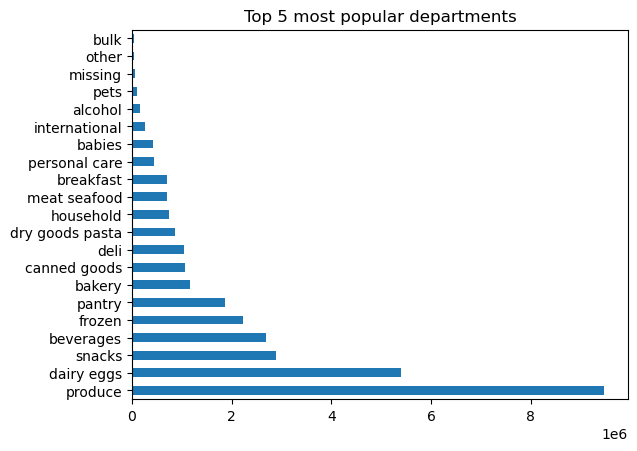

In [103]:
# bar chart of department popularity 
bar_top_5_dept_all = df_ords_prods_custm['department'].value_counts().plot.barh(title='Top 5 most popular departments')

Top 5 departments are produce, dairy eggs, snacks, beverages and frozen aross all customers.

In [118]:
# create a subset of top 5 deparment from all customers
df_top_5_department = df_ords_prods_custm.loc[df_ords_prods_custm['department_id'].isin([4,16,19,7,1])]

In [82]:
# how top 5 department ranked per region
top_5_department_region = pd.crosstab(df_ords_prods_custm['region'], df_top_5_department['department'], dropna = False)

In [ ]:
top_5_department_region = pd.crosstab(df_ords_prods_custm['region'], df_top_5_department['department'], dropna = False)

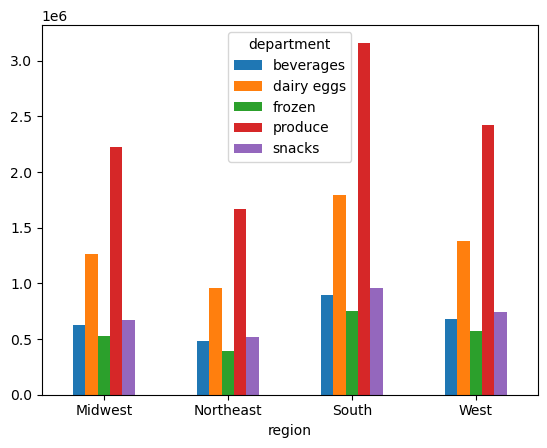

In [97]:
bar_top_5_department_region = top_5_department_region.plot.bar(rot=0)

In [84]:
# how top 5 department ranked per age category
top_5_department_age = pd.crosstab(df_ords_prods_custm['age_category'], df_top_5_department['department'], dropna = False)

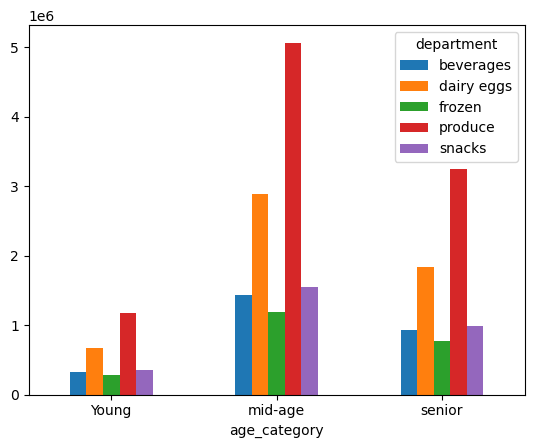

In [95]:
bar_top_5_department_age = top_5_department_age.plot.bar(rot=0)

In [86]:
# how top 5 department ranked per marital status
top_5_department_marital_status = pd.crosstab(df_ords_prods_custm['marital_status'], df_top_5_department['department'], dropna = False)

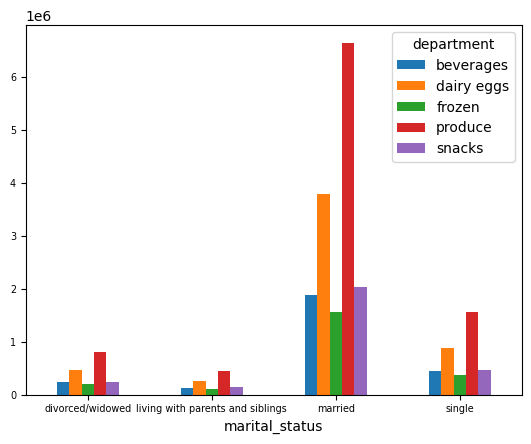

In [105]:
bar_top_5_department_marital_status = top_5_department_marital_status.plot.bar(rot=0, fontsize = 'x-small')

In [119]:
# how top 5 department ranked per loyalty status
top_5_department_loyalty = pd.crosstab(df_ords_prods_custm['loyalty_flag'], df_top_5_department['department'], dropna = False)

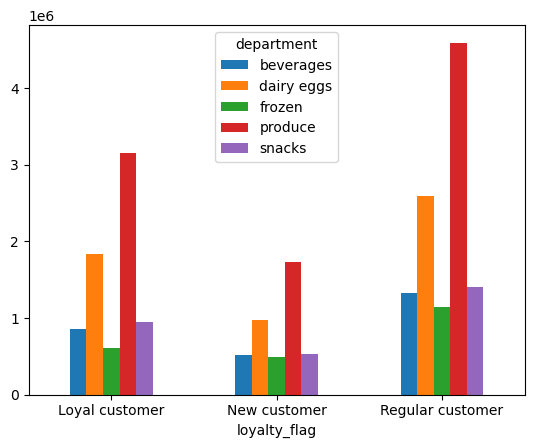

In [120]:
bar_top_5_department_loyalty = top_5_department_loyalty.plot.bar(rot=0)

In [125]:
# loyalty customer in each department
department_loyalty = pd.crosstab(df_ords_prods_custm['department'],df_ords_prods_custm['loyalty_flag'], dropna = False)

In [126]:
department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


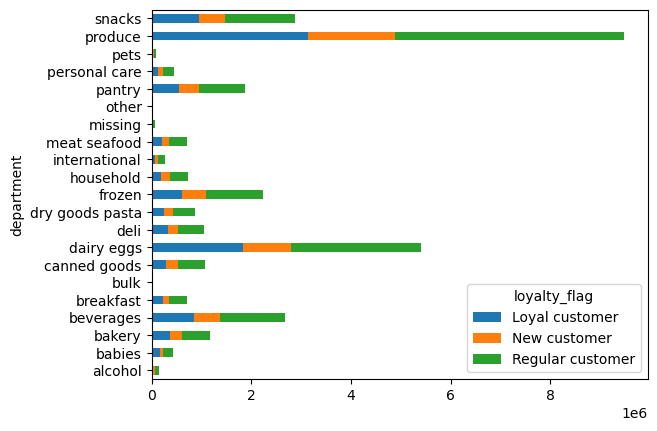

In [127]:
bar_department_loyalty = department_loyalty.plot.barh(stacked = True)

In [23]:
# age category in each department
department_age = pd.crosstab(df_ords_prods_custm['department'],df_ords_prods_custm['age_category'], dropna = False)

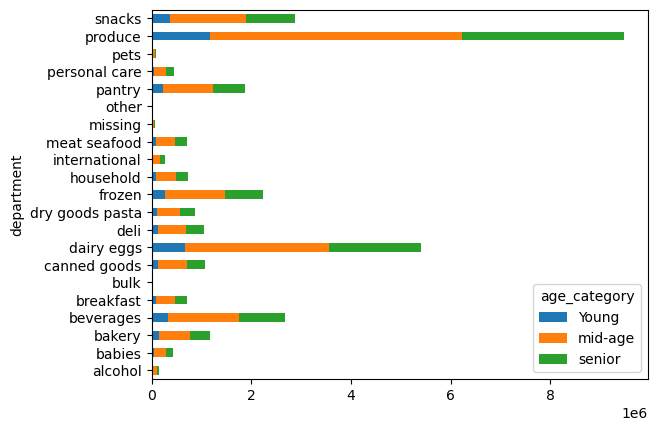

In [24]:
bar_department_age = department_age.plot.barh(stacked = True)

In [26]:
# marital status in each department
department_marital_status = pd.crosstab(df_ords_prods_custm['department'],df_ords_prods_custm['marital_status'], dropna = False)

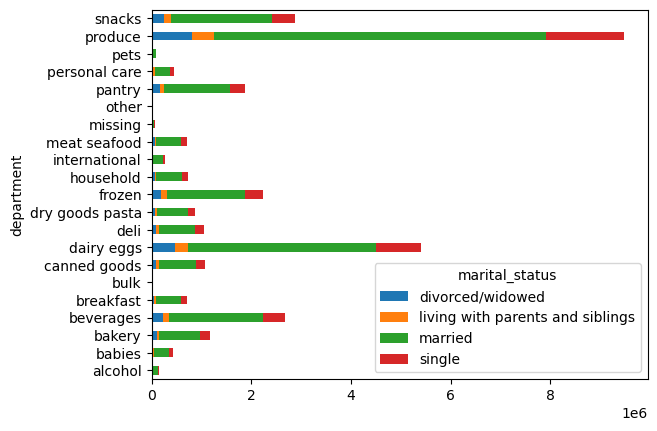

In [27]:
bar_department_marital_status = department_marital_status.plot.barh(stacked = True)

In [36]:
# region by department
department_region = pd.crosstab(df_ords_prods_custm['department'],df_ords_prods_custm['region'], dropna = False)

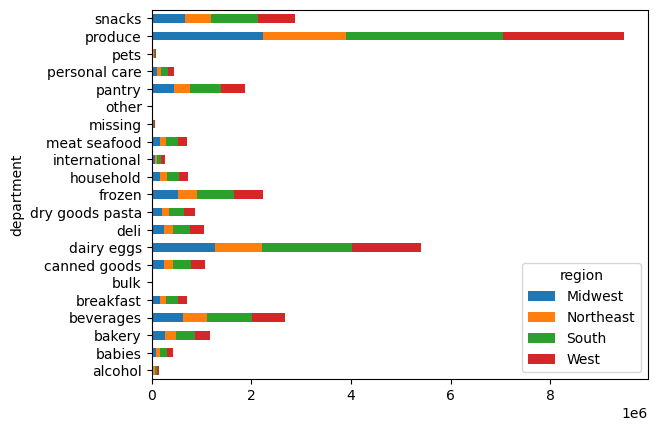

In [38]:
bar_department_region = department_region.plot.barh(stacked = True)

In [62]:
# frequency customers catergory per region
frequency_region = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['order_frequency_flag'], dropna = False)

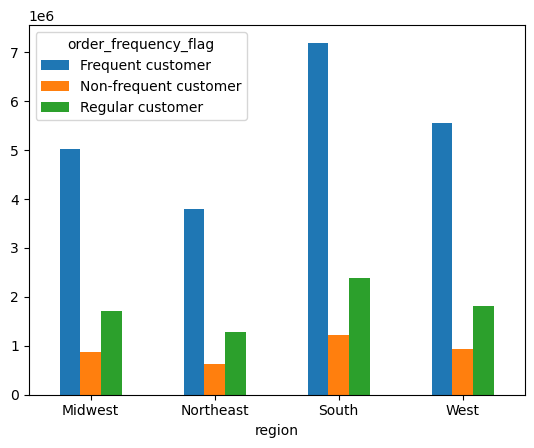

In [91]:
bar_frequency_region = frequency_region.plot.bar(rot=0)

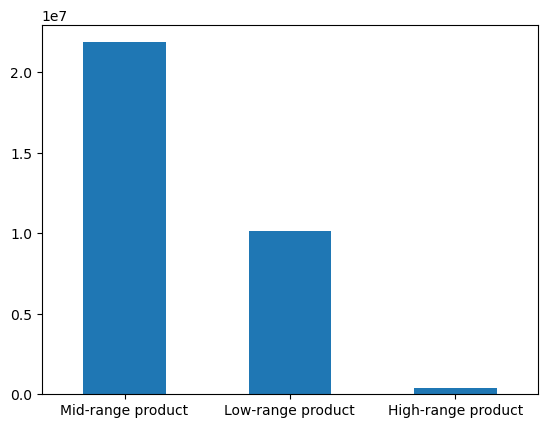

In [4]:
bar_price_range = df_ords_prods_custm['price_range_loc'].value_counts().plot.bar(rot=0)

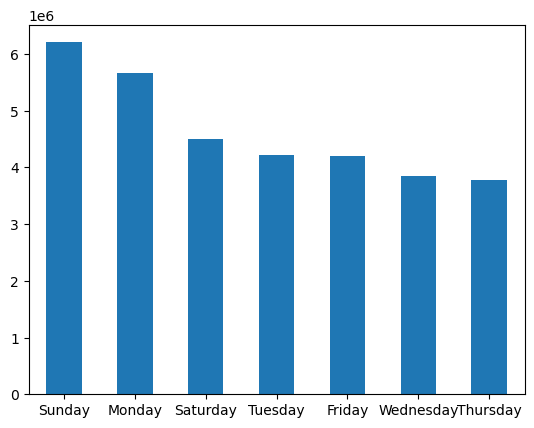

In [6]:
# busy days of a week
bar_orders_day_of_wk = df_ords_prods_custm['orders_day_of_week'].value_counts().plot.bar(rot=0)

In [105]:
# customer loyalty vs order frequency
frequency_loyalty = pd.crosstab(df_ords_prods_custm['loyalty_flag'], df_ords_prods_custm['order_frequency_flag'], dropna = False)

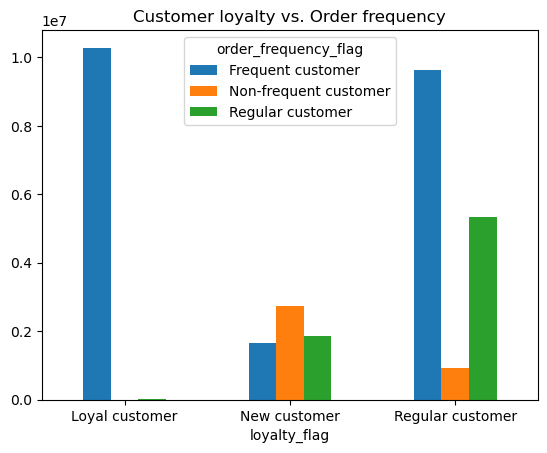

In [107]:
bar_frequency_loyalty = frequency_loyalty.plot.bar(rot=0, title='Customer loyalty vs. Order frequency')

In [64]:
df_ords_prods_custm.groupby('income_flag').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices            days_since_prior_order           
                 mean   max  min                   mean   max  min
income_flag                                                       
high income  7.957516  25.0  1.0              11.039865  30.0  0.0
low income   6.495264  25.0  1.0              11.686944  30.0  0.0
mid income   7.774902  25.0  1.0              11.101332  30.0  0.0

In [65]:
df_ords_prods_custm.groupby('age_category').agg({'prices': ['mean', 'max', 'min'], 'days_since_prior_order': ['mean', 'max', 'min']})

prices            days_since_prior_order           
                  mean   max  min                   mean   max  min
age_category                                                       
Young         7.784881  25.0  1.0              11.093030  30.0  0.0
mid-age       7.788660  25.0  1.0              11.114039  30.0  0.0
senior        7.794493  25.0  1.0              11.092552  30.0  0.0

In [8]:
pd.pandas.set_option('display.max_columns', None)

In [9]:
df_ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_dependants,marital_status,income
0,2539329,1,1,Tuesday,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,Wednesday,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,Wednesday,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,Thursday,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,Thursday,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [94]:
# average days sicne prior order in each department
department_frequency = df_ords_prods_custm.groupby('department')['days_since_prior_order'].mean().sort_values(ascending=False)

In [95]:
department_frequency

department
household          11.996490
pets               11.867322
dry goods pasta    11.774450
frozen             11.730829
canned goods       11.656079
personal care      11.593145
meat seafood       11.432021
deli               11.345655
breakfast          11.296101
international      11.291251
pantry             11.163256
bakery             11.097613
beverages          11.053389
dairy eggs         10.986054
other              10.952867
snacks             10.947879
produce            10.856212
alcohol            10.340887
missing            10.218559
bulk               10.104230
babies             10.004465
Name: days_since_prior_order, dtype: float64

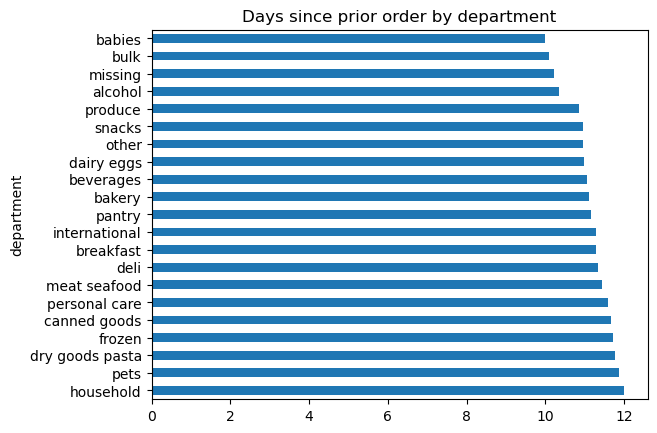

In [101]:
bar_department_frequency = department_frequency.plot.barh(title='Days since prior order by department')

In [92]:
bar_frequency_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_region.png'),bbox_inches='tight')

In [106]:
bar_top_5_department_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_5_department_marital_status.png'),bbox_inches='tight')

In [96]:
bar_top_5_department_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_5_department_age.png'),bbox_inches='tight')

In [98]:
bar_top_5_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_5_department_region.png'),bbox_inches='tight')

In [104]:
bar_top_5_dept_all.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_5_dept_all.png'),bbox_inches='tight')

In [ ]:
pie_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_marital_status.png'))

In [ ]:
pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region.png'))

In [ ]:
pie_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age.png'))

In [ ]:
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

In [ ]:
pie_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income.png'))

In [108]:
bar_high_activity_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_activity_region.png'),bbox_inches='tight')

In [110]:
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_region.png'),bbox_inches='tight')

In [112]:
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income.png'),bbox_inches='tight')

In [115]:
bar_marital_status_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status_income.png'),bbox_inches='tight')

In [117]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'),bbox_inches='tight')

In [120]:
bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_region.png'),bbox_inches='tight')

In [121]:
bar_marital_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status_region.png'),bbox_inches='tight')

In [123]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'),bbox_inches='tight')

In [5]:
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'),bbox_inches='tight')

In [7]:
bar_orders_day_of_wk.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_wk.png'),bbox_inches='tight')

In [102]:
bar_department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'),bbox_inches='tight')

In [108]:
bar_frequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_loyalty.png'),bbox_inches='tight')

In [121]:
bar_top_5_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_5_department_loyalty.png'),bbox_inches='tight')

In [128]:
bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_loyalty.png'),bbox_inches='tight')

In [20]:
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png'),bbox_inches='tight')

In [25]:
bar_department_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_age.png'),bbox_inches='tight')

In [28]:
bar_department_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_marital_status.png'),bbox_inches='tight')

In [71]:
bar_region_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending_flag.png'),bbox_inches='tight')

In [89]:
df_ords_prods_custm.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_custm.pkl'))